In [2]:
import gym
import torch
from Model import *
import matplotlib.pyplot as plt
import cv2 as cv2
import torchvision.transforms as transforms

In [3]:
env = gym.make("Breakout-v4")

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:505: UserWarning: WARN: The environment Breakout-v4 is out of date. You should consider upgrading to version `v5` with the environment ID `ALE/Breakout-v5`.
  logger.warn(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:138: DeprecationWarning: WARN: Function `hash_seed(seed, max_bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:175: DeprecationWarning: WARN: Function `_bigint_from_bytes(bytes)` is marked as deprecated and will be removed in the future. 
  deprecation(
A.L.E: Arcade Learning Environment (version +a7a216c)
[Powered by Stella]


In [4]:
state = env.reset()
state.shape

(210, 160, 3)

In [5]:
state, reward, done, _ = env.step(1)

/home/wyq/anaconda3/lib/python3.9/site-packages/gym/utils/seeding.py:47: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(


In [14]:
trans = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])
def get_image_state(state):
    state = state[35:195, 10:150] # 切割掉无用的部分
    state = cv2.cvtColor(state, cv2.COLOR_RGB2GRAY) # 转为灰度图,此时图像的channel只剩1
    state = cv2.resize(state, (84, 84))
    image = torch.from_numpy(state).type(torch.float32).unsqueeze(0)
    return trans(image)

In [15]:
tensor_image = get_image_state(state).unsqueeze(0)
tensor_image.shape

torch.Size([1, 1, 84, 84])

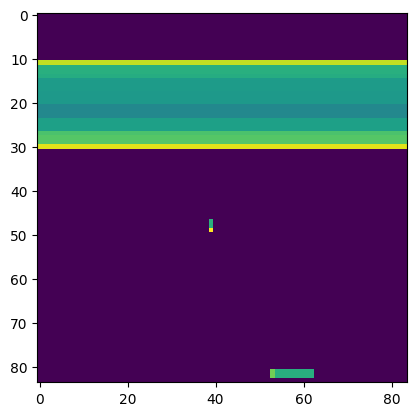

In [16]:
plt.imshow(tensor_image.squeeze(0).squeeze(0))

In [17]:
cov = ConvNetwork()
cov_image = cov.conv_layers(tensor_image).squeeze(0).squeeze(0)
cov_image.shape

torch.Size([84, 84])

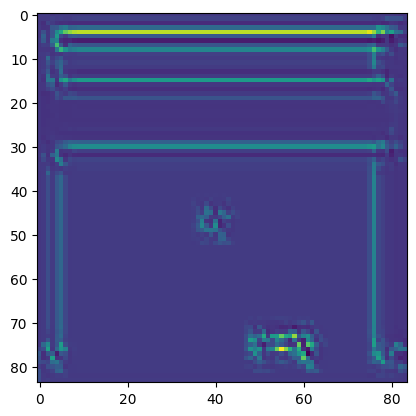

In [19]:
plt.imshow(cov_image.detach().numpy())

In [7]:
net = ActorSoftmax(256, 4)
critic_net = Critic()

In [8]:
net(tensor_image).shape

torch.Size([1, 4])

In [9]:
critic_net(tensor_image).shape

torch.Size([1, 1])